In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## Generate Synthetic Data for Regression

In [29]:
np.random.seed(42)
N = 10000
c = 3
X = 2 * np.random.rand(N, c)  # Three independent variables
coeffs = np.array([-3, 2.5, -2])  # True coefficients for multiple regression
y = X.dot(coeffs) + np.random.randn(N) * 2  # Adding Gaussian noise

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Step 2: Implement and Train Models
lr_simple = LinearRegression()

In [32]:
lr_simple.fit(X_train[:, [0]], y_train)

LinearRegression()

In [33]:

y_pred_simple = lr_simple.predict(X_test[:, [0]])

In [34]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

In [46]:
#Random Forest

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [51]:
# Decison Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [55]:
# Support Vector Machine
svm = SVR()
svm.fit(X_train, y_train)       
y_pred_svm = svm.predict(X_test)

In [35]:
# Ridge Regression (L2 Regularization)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [36]:
# Lasso Regression (L1 Regularization)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

## Evaluate Model Performance

In [37]:

def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

In [56]:
evaluate_model("Simple Linear Regression", y_test, y_pred_simple)
evaluate_model("Multiple Linear Regression", y_test, y_pred_multi)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Decison Tree", y_test, y_pred_dt)
evaluate_model("Support Vector Machine", y_test, y_pred_svm)

Simple Linear Regression Performance:
MSE: 7.4176
R-squared: 0.2802

Multiple Linear Regression Performance:
MSE: 4.0773
R-squared: 0.6043

Ridge Regression Performance:
MSE: 4.0772
R-squared: 0.6043

Lasso Regression Performance:
MSE: 6.1662
R-squared: 0.4016

Random Forest Performance:
MSE: 4.6584
R-squared: 0.5479

Decison Tree Performance:
MSE: 8.5058
R-squared: 0.1746

Support Vector Machine Performance:
MSE: 4.1232
R-squared: 0.5999



## Checking for Assumptions for Lasso Regression

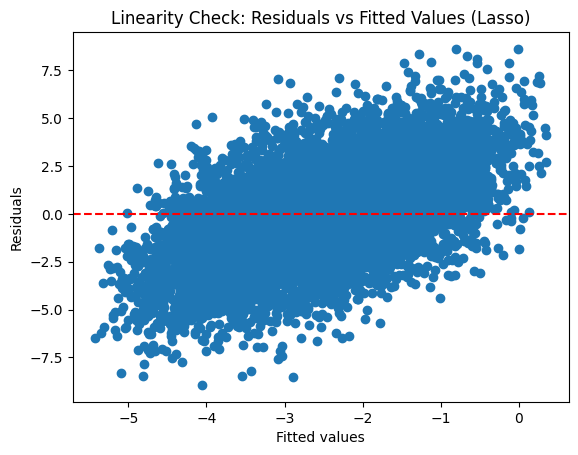

In [39]:
# 1. Linearity Check (Plot Residuals vs Fitted Values)
y_train_pred = lasso.predict(X_train)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Fitted Values (Lasso)")
plt.show()

In [40]:
# 2. Normality of Residuals (Shapiro-Wilk Test)
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality: p-value = {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test for Normality: p-value = 0.6531


c:\Users\eengj\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8000.
  res = hypotest_fun_out(*samples, **kwds)


In [41]:
# 3. Multicollinearity Check (Variance Inflation Factor - VIF)
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + [f"X{i+1}" for i in range(X_train.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X_train_const, i) for i in range(X_train_const.shape[1])]
print("\nVariance Inflation Factor (VIF) for Multicollinearity:")
print(vif_data)


Variance Inflation Factor (VIF) for Multicollinearity:
  Feature       VIF
0   const  9.972771
1      X1  1.000015
2      X2  1.000015
3      X3  1.000006


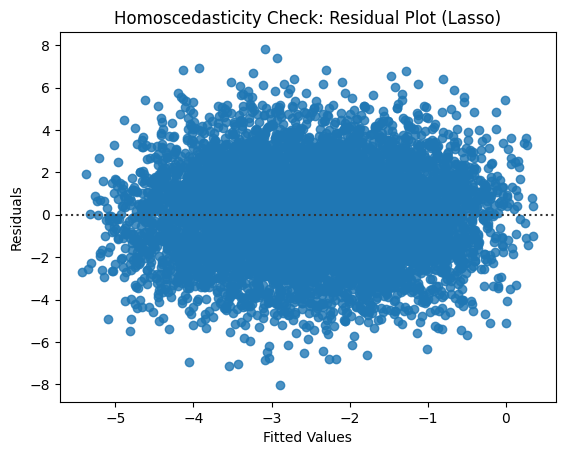

In [44]:
# 4. Homoscedasticity Check (Plot Residuals)
sns.residplot(x=y_train_pred, y=residuals, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residual Plot (Lasso)")
plt.show()
